In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

class_data = pd.read_csv('classData.csv')

x = class_data[["Ia","Ib","Ic","Va","Vb","Vc"]].values
y = class_data[["G", "C", "B", "A"]].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaled_xtrain = StandardScaler().fit_transform(x_train)
scaled_xtest = StandardScaler().fit_transform(x_test)


In [ ]:
model = rfc(n_estimators=25, random_state=42)
model.fit(scaled_xtrain, y_train)
y_pred = model.predict(scaled_xtest)

In [ ]:
correct_pred = np.sum(np.all(y_pred == y_test, axis=1))
total_pred = len(y_test)
accuracy = correct_pred / total_pred
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.86


In [ ]:
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85       691
           1       0.99      0.99      0.99       611
           2       1.00      0.99      0.99       849
           3       1.00      1.00      1.00       890

   micro avg       0.97      0.95      0.96      3041
   macro avg       0.97      0.95      0.96      3041
weighted avg       0.97      0.95      0.96      3041
 samples avg       0.68      0.67      0.67      3041



In [ ]:
idx = np.random.randint(0,len(scaled_xtest))
input = scaled_xtest[idx]
print(input)
print(f'Actual Result: {y_test[idx]}')
print(f'prediction: {model.predict([input])}')

[-0.15015355  0.12309756  0.00336478  1.21412722 -1.86247838  0.74675192]
Actual Result: [0 0 0 0]
prediction: [[0 0 0 0]]


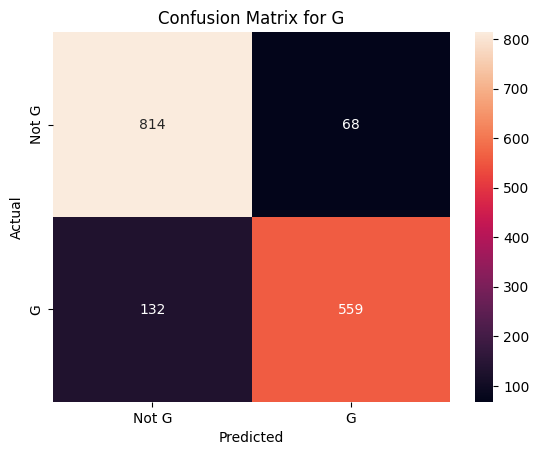

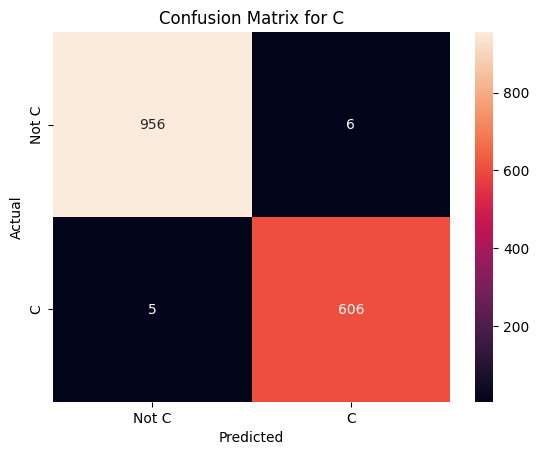

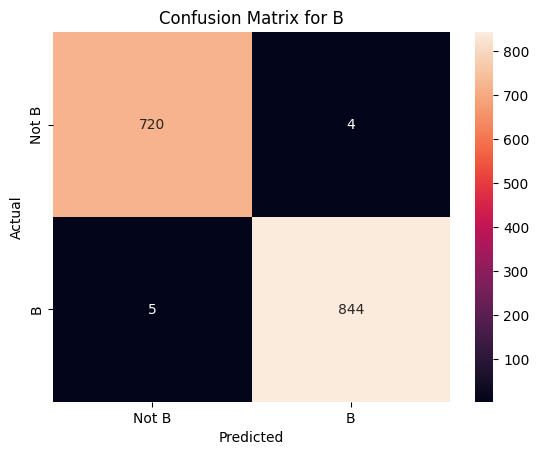

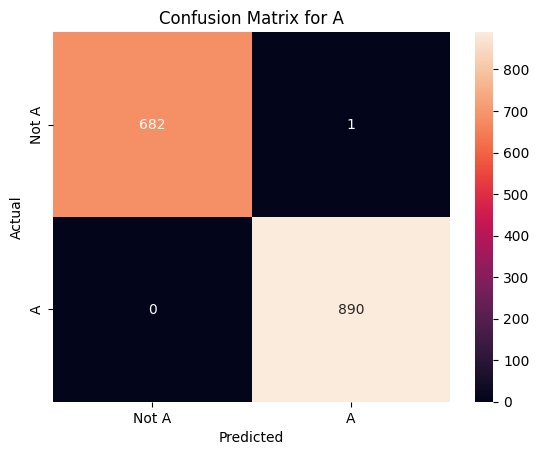

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm_g = confusion_matrix(y_test[:,0], y_pred[:,0])
cm_c = confusion_matrix(y_test[:,1], y_pred[:,1])
cm_b = confusion_matrix(y_test[:,2], y_pred[:,2])
cm_a = confusion_matrix(y_test[:,3], y_pred[:,3])


sns.heatmap(cm_g, annot=True, fmt='d', xticklabels=['Not G', 'G'], yticklabels=['Not G', 'G'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for G')
plt.show()

sns.heatmap(cm_c, annot=True, fmt='d', xticklabels=['Not C', 'C'], yticklabels=['Not C', 'C'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for C')
plt.show()

sns.heatmap(cm_b, annot=True, fmt='d', xticklabels=['Not B', 'B'], yticklabels=['Not B', 'B'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for B')
plt.show()

sns.heatmap(cm_a, annot=True, fmt='d', xticklabels=['Not A', 'A'], yticklabels=['Not A', 'A'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for A')
plt.show()